In [1]:
pip install tensorflow_hub

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import cv2

import PIL
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
import PIL.Image as Image


In [6]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

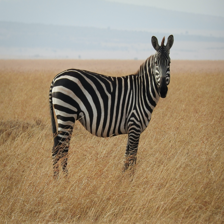

In [7]:
img = Image.open("zebra.jpg").resize(IMAGE_SHAPE)
img

In [8]:
img = np.array(img)/255.0
img.shape

(224, 224, 3)

In [9]:
img[np.newaxis, ...]

array([[[[0.73333333, 0.76862745, 0.78431373],
         [0.72156863, 0.76470588, 0.78039216],
         [0.71372549, 0.76470588, 0.77647059],
         ...,
         [0.71764706, 0.74509804, 0.74509804],
         [0.70980392, 0.74117647, 0.74901961],
         [0.70588235, 0.7372549 , 0.74509804]],

        [[0.7254902 , 0.76470588, 0.78039216],
         [0.71372549, 0.76078431, 0.78431373],
         [0.70980392, 0.76078431, 0.78431373],
         ...,
         [0.71372549, 0.74509804, 0.74901961],
         [0.70980392, 0.74509804, 0.74901961],
         [0.70588235, 0.7372549 , 0.74901961]],

        [[0.71764706, 0.76470588, 0.78431373],
         [0.70980392, 0.76078431, 0.78431373],
         [0.70980392, 0.76078431, 0.78431373],
         ...,
         [0.70980392, 0.74901961, 0.75294118],
         [0.70980392, 0.74509804, 0.75294118],
         [0.70980392, 0.74117647, 0.74509804]],

        ...,

        [[0.58823529, 0.47843137, 0.31372549],
         [0.55686275, 0.43529412, 0.2627451 ]

In [10]:
result = classifier.predict(img[np.newaxis, ...])
result.shape

1/1 [==============================] - 1s 1s/step


(1, 1001)

In [11]:
predicted_label_index = np.argmax(result)
predicted_label_index

341

In [12]:
tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [13]:
image_labels[predicted_label_index]

'zebra'

In [14]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [15]:
data_dir

'.\\datasets\\flower_photos'

In [16]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [17]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [18]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

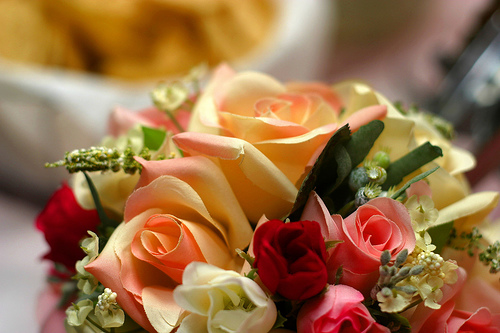

In [19]:
PIL.Image.open(str(roses[57]))

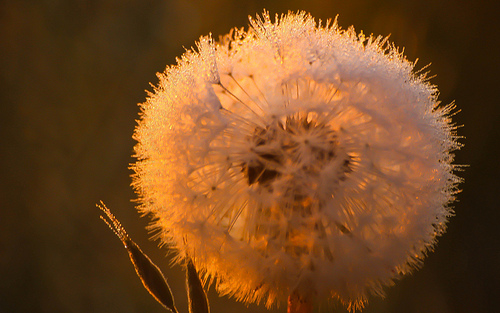

In [20]:
dandelion = list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(dandelion[95]))

In [21]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [22]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [23]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [24]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [25]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [26]:
X = np.array(X)
y = np.array(y)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [28]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [39]:
X[0].shape

(224, 224, 3)

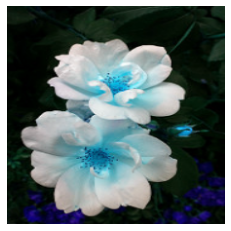

In [42]:
plt.axis('off')
plt.imshow(X[0])

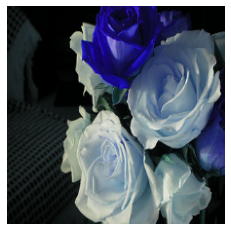

In [43]:
plt.axis('off')
plt.imshow(X[1])

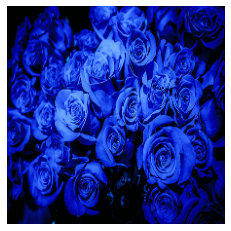

In [44]:
plt.axis('off')
plt.imshow(X[2])

In [47]:
predicted = classifier.predict(np.array([X[0], X[1], X[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 0s 135ms/step


array([795, 880, 795], dtype=int64)

In [51]:
image_labels[880]

'umbrella'

In [52]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False) # 'feature_vector', this gives the same model except the last layer
# feature vector gives all layer expect last one and fized weights

In [65]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [54]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 81s 790ms/step - loss: 0.8540 - acc: 0.6770
Epoch 2/5
86/86 [==============================] - 57s 660ms/step - loss: 0.4226 - acc: 0.8521
Epoch 3/5
86/86 [==============================] - 56s 650ms/step - loss: 0.3300 - acc: 0.8910
Epoch 4/5
86/86 [==============================] - 55s 643ms/step - loss: 0.2768 - acc: 0.9092
Epoch 5/5
86/86 [==============================] - 60s 701ms/step - loss: 0.2365 - acc: 0.9281


In [55]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 28s 781ms/step - loss: 0.3736 - acc: 0.8671


[0.37362217903137207, 0.8671023845672607]